In [ ]:
include("../src/vafdyn.jl")
using .VAFDyn
using Plots

In [2]:
# set plots backend
gr()

Plots.GRBackend()

Here we investigate whether sampling a large population can be replaced by evolving a different population with a mapped set of parameters. The mapping is as follows:

For a true population with 
- $N$ size
- $T$ evolvetime 
- $\mu$ mutation rate 

sampled to a size $n$, we evolve an alternative system with

- $n$ (same as sample)
- $t$ evolvetime
- $\nu$ mutation rate

The mapping is given by:

\begin{equation}
t = T \left( \frac{n}{N} \right) ^2
\end{equation}

\begin{equation}
\nu = \mu \frac{N}{n}
\end{equation}


# Illustrative test

In [48]:
# system parameters
paramsTrue = Dict(
    "ρ"=>1.5,
    "μ"=>1.2,
    "N"=>3000,
    "ϕ"=>4.,
    "evolveTime"=>59
)

Dict{String,Real} with 5 entries:
  "μ"          => 1.2
  "N"          => 3000
  "ρ"          => 1.5
  "ϕ"          => 4.0
  "evolveTime" => 59

In [49]:
# true discrete Markov Chain evolve
dfs = VAFDyn.DFreqspace(paramsTrue["N"])
VAFDyn.evolveVAF(dfs, paramsTrue, paramsTrue["evolveTime"]);

In [50]:
sampleSize = 200
sampleFrac = sampleSize/paramsTrue["N"];

In [51]:
# sample distribution
sdfs = VAFDyn.sampler(dfs, sampleSize);

In [54]:
# alternative "equivalent" evolve

paramsAlt = Dict(
    "N"=>Integer(round(paramsTrue["N"]*sampleFrac)),
    "ρ"=>paramsTrue["ρ"],
    "ϕ"=>paramsTrue["ϕ"],
    "μ"=>paramsTrue["μ"]*1/sampleFrac,
    "evolveTime"=>paramsTrue["evolveTime"]*sampleFrac^2
)

adfs = VAFDyn.DFreqspace(paramsAlt["N"])
VAFDyn.evolveVAF(adfs, paramsAlt, paramsAlt["evolveTime"], 0.001);

println(paramsAlt)

Dict{String,Real}("μ" => 18.0,"N" => 200,"ρ" => 1.5,"ϕ" => 4.0,"evolveTime" => 0.26222222222222225)


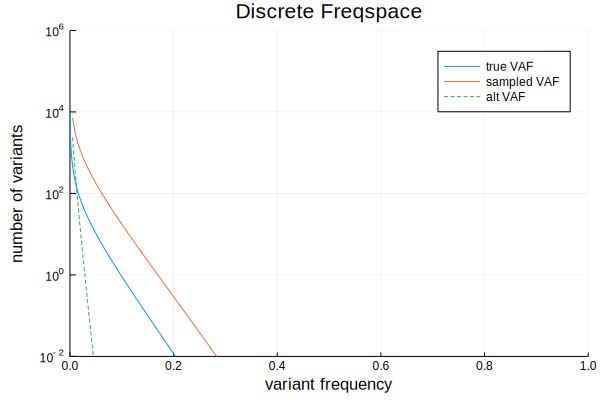

In [53]:
# plotting

h = plot(dfs.freqs_f[2:end-1], dfs.n_f[2:end-1], label="true VAF", yaxis=:log10)
plot!(sdfs.freqs_f[2:end-1], sdfs.n_f[2:end-1], label="sampled VAF")
plot!(adfs.freqs_f[2:end-1], adfs.n_f[2:end-1], label="alt VAF", linestyle=:dash)
xlims!((0, 1))
ylims!((10^-2, 10^6))
xlabel!("variant frequency")
ylabel!("number of variants")
title!("Discrete Freqspace")
display(h)

# Testing multiple bottleneck sizes

## Parameter set 1

In [161]:
# true system parameters
paramsTrue = Dict(
    "ρ"=>1.,
    "μ"=>1.,
    "N"=>100,
    "evolveTime"=>1000
)

# true discrete Markov Chain evolve
dfs = VAFDyn.DFreqspace(paramsTrue["N"])
VAFDyn.evolveVAF(dfs, paramsTrue, paramsTrue["evolveTime"], 0.001)

paramsTrue

Dict{String,Real} with 4 entries:
  "μ"          => 1.0
  "N"          => 100
  "ρ"          => 1.0
  "evolveTime" => 1000

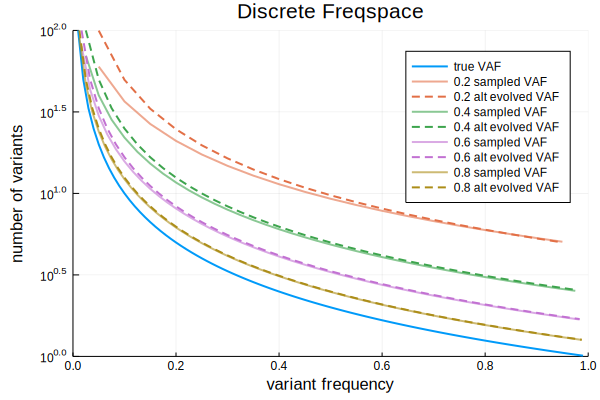

In [162]:
h = plot(dfs.freqs_f[2:end-1], dfs.n_f[2:end-1], label="true VAF", yaxis=:log10, linewidth=2)

for (i, sampleFrac) in enumerate(0.2:0.2:0.8)
    sampleSize = Integer(round(sampleFrac*paramsTrue["N"]))
    sdfs, _ = VAFDyn.sampler(dfs, sampleSize);
    
    paramsAlt = Dict(
        "N"=>Integer(round(paramsTrue["N"]*sampleFrac)),
        "ρ"=>1.,
        "μ"=>paramsTrue["μ"]/sampleFrac,
        "evolveTime"=>paramsTrue["evolveTime"]*sampleFrac^2
    )

    adfs = VAFDyn.DFreqspace(paramsAlt["N"])
    VAFDyn.evolveVAF(adfs, paramsAlt, paramsAlt["evolveTime"], 0.001)
    plot!(sdfs.freqs_f[2:end-1], sdfs.n_f[2:end-1], label=string(sampleFrac)*" sampled VAF",
        linewidth=2, linecolor=i+1, linealpha=0.6)
    plot!(adfs.freqs_f[2:end-1], adfs.n_f[2:end-1], label=string(sampleFrac)*" alt evolved VAF",
        linestyle=:dash, linewidth=2, linecolor=i+1)
end
xlims!((0, 1))
ylims!((10^0, 10^2))
xlabel!("variant frequency")
ylabel!("number of variants")
title!("Discrete Freqspace")
display(h)

    

## Parameter set 2

In [163]:
# true system parameters
paramsTrue = Dict(
    "ρ"=>1.,
    "μ"=>1.,
    "N"=>4000,
    "evolveTime"=>4000
)

# true discrete Markov Chain evolve
dfs = VAFDyn.DFreqspace(paramsTrue["N"])
VAFDyn.evolveVAF(dfs, paramsTrue, paramsTrue["evolveTime"], 0.0001)

paramsTrue

Dict{String,Real} with 4 entries:
  "μ"          => 1.0
  "N"          => 4000
  "ρ"          => 1.0
  "evolveTime" => 4000

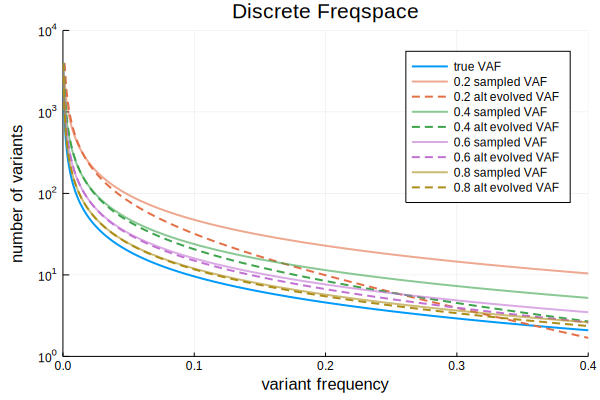

In [166]:
h = plot(dfs.freqs_f[2:end-1], dfs.n_f[2:end-1], label="true VAF", yaxis=:log10, linewidth=2)

for (i, sampleFrac) in enumerate(0.2:0.2:0.8)
    sampleSize = Integer(round(paramsTrue["N"]*sampleFrac))
    sdfs, _ = VAFDyn.sampler(dfs, sampleSize);
    
    paramsAlt = Dict(
        "N"=>Integer(round(paramsTrue["N"]*sampleFrac)),
        "ρ"=>1.,
        "μ"=>paramsTrue["μ"]*1/sampleFrac,
        "evolveTime"=>paramsTrue["evolveTime"]*sampleFrac^2
    )

    adfs = VAFDyn.DFreqspace(paramsAlt["N"])
    VAFDyn.evolveVAF(adfs, paramsAlt, paramsAlt["evolveTime"], 0.0001)
    plot!(sdfs.freqs_f[2:end-1], sdfs.n_f[2:end-1], label=string(sampleFrac)*" sampled VAF",
        linewidth=2, linecolor=i+1, linealpha=0.6)
    plot!(adfs.freqs_f[2:end-1], adfs.n_f[2:end-1], label=string(sampleFrac)*" alt evolved VAF",
        linestyle=:dash, linewidth=2, linecolor=i+1)
end
xlims!((0, 0.4))
ylims!((10^0, 10^4))
xlabel!("variant frequency")
ylabel!("number of variants")
title!("Discrete Freqspace")
display(h)